In [15]:
using Plots, StatsBase, LinearAlgebra
LinearAlgebra.BLAS.set_num_threads(1)

In [16]:
function sim(x, f, p, b, n)
    for _ in 1:n
        if rand() < p
            x = x + f*x*b
        else
            x = x - f*x*b
        end
    end
    return x
end

sim (generic function with 2 methods)

In [29]:
function sim(x, f, p, b, n, N_mc)
    X = zeros(N_mc)
    @Threads.threads for i in 1:N_mc
        X[i] = sim(x, f, p, b, n)
    end
    return X
end

sim (generic function with 2 methods)

┌ Warning: Skipped xaxis arg right
└ @ Plots /home/woojac/.julia/packages/Plots/S2aH5/src/axes.jl:73
┌ Warning: Skipped yaxis arg right
└ @ Plots /home/woojac/.julia/packages/Plots/S2aH5/src/axes.jl:73
┌ Warning: Skipped zaxis arg right
└ @ Plots /home/woojac/.julia/packages/Plots/S2aH5/src/axes.jl:73


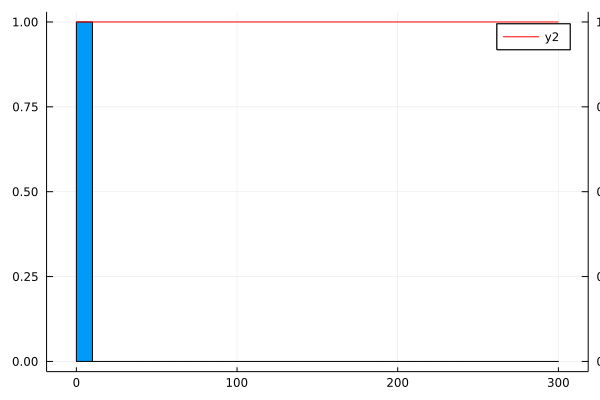

In [19]:
# Betting 50% on a 2:1 bet
X = sim(100, 0.5, 0.5, 1.0, 2, 1000000);
plot(X,lt=:hist,bins=0:10:300,normalize=:probability)
gcdf = ecdf(X)
plot(twinx(),x -> gcdf(x), 0, 300, axis=:right,color=:red,xticks=:none,ylims=[0,1])

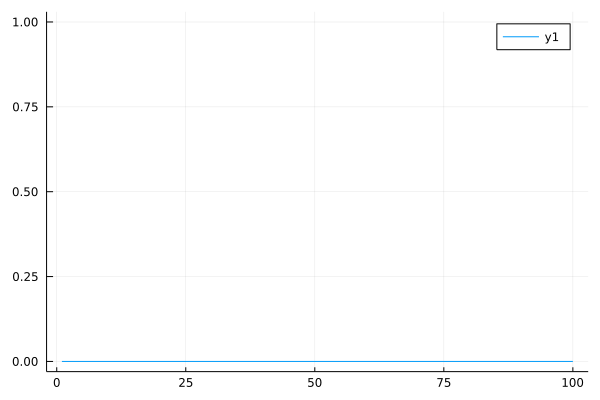

In [21]:
f(n) = mean(sim(100, 0.5, 0.5, 1.0, n, 100000))
plot(f.(1:100))

In [30]:
sim(100, 0.5, 0.5, 1.0, 10, 100000000)

100000000-element Vector{Float64}:
   71.19140625
   71.19140625
   71.19140625
    2.63671875
 1922.16796875
    2.63671875
    0.87890625
   71.19140625
   23.73046875
    0.29296875
   23.73046875
  213.57421875
  213.57421875
    ⋮
  213.57421875
   71.19140625
    0.87890625
   23.73046875
    2.63671875
   23.73046875
    2.63671875
   23.73046875
   23.73046875
    7.91015625
  213.57421875
   71.19140625

In [31]:
LinearAlgebra.BLAS.get_num_threads()

1